### Assignment_2: Unsupervised Data Mining

Q1. 30 Points

Q2. 30 Points

Q3. 20 Points

Q4. 20 Points

Q5. 10 Bonus Points

In [107]:
# Data Pre-processing
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA

from nose.tools import assert_equal, assert_is_instance, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal
from pandas.util.testing import assert_frame_equal

##### The things you should pay attention:

Make sure you fill in any place that says YOUR CODE HERE. Do not write your answer in anywhere else other than where it says YOUR CODE HERE. Anything you write anywhere else will be removed or overwritten by the autograder.

Before you submit your assignment, make sure everything runs as expected. If you have sufficient time, please go to menubar, select Kernel, and restart the kernel and run all cells (Restart & Run all).

Make sure that you save your work (in the menubar, select File → Save and CheckPoint)

Good Luck!

UP

---------

### Problem_1: Dimension Reduction

With Problem_1, we aim to have a better understanding of dimension reduction with PCA. We will use Delta Airline data. Delta and other major airlines have data on all of their aircrafts on their website. [e.g.](https://www.delta.com/content/www/en_US/traveling-with-us/airports-and-aircraft/Aircraft.html)

We will use delta.csv uploaded on Canvas Module for this assignment.

This data set has 34 columns (including the names of the aircrafts) on 44 aircrafts. It inclues both quantitative measurements such as cruising speed, accommodation and range in miles, as well as categorical data, such as whether a particular aircraft has Wi-Fi or video. These binary are assigned values of either 1 or 0, for yes or no respectively.

In [108]:
df = pd.read_csv('delta.csv', index_col='Aircraft')


In [109]:
df.head()

,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),Seat Width (Eco Comfort),...,Video,Power,Satellite,Flat-bed,Sleeper,Club,First Class,Business,Eco Comfort,Economy
Aircraft,,,,,,,,,,,,,,,,,,,,,
Airbus A319,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,0,0,0,0,0,0,1,0,1,1
Airbus A319 VIP,19.4,44,12,19.4,40.0,28,21.0,59.0,14,0.0,...,1,0,0,0,0,1,1,1,0,0
Airbus A320,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,0,0,0,0,0,0,1,0,1,1
Airbus A320 32-R,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,0,0,0,0,0,0,1,0,1,1
Airbus A330-200,0.0,0,0,0.0,0.0,0,21.0,60.0,32,18.0,...,1,1,0,1,0,0,0,1,1,1


First, let's look at the attributes related to the aircraft physical characteristics:

Cruising Speed (mph)
Range (miles)
Engines
Wingspan (ft)
Tail Height (ft)
Length (ft)
These six variables are about in the middle of the data frame (and it's part of your task to figure out where they are located).

Write a function named plot_pairgrid() that takes a pandas.DataFrame and uses seaborn.PairGrid to visualize the attributes related to the six physical characteristics listed above. The plots on the diagonal should be histograms of corresponding attributes, and the off-diagonal should be scatter plots.

In [110]:
delta_pca = df.iloc[:, [16, 17, 18, 19, 20,21]]
delta_pca.head

<bound method NDFrame.head of                               Cruising Speed (mph)  Range (miles)  Engines  \
Aircraft                                                                     
Airbus A319                                    517           2399        2   
Airbus A319 VIP                                517           3119        2   
Airbus A320                                    517           2420        2   
Airbus A320 32-R                               517           2420        2   
Airbus A330-200                                531           6536        2   
Airbus A330-200 (3L2)                          531           6536        2   
Airbus A330-200 (3L3)                          531           5343        2   
Airbus A330-300                                531           5343        2   
Boeing 717                                     504           1510        2   
Boeing 737-700 (73W)                           517           2925        2   
Boeing 737-800 (738)              

In [111]:

def plot_pairgrid(df):
    '''
    Uses seaborn.PairGrid to visualize the attributes related to the six physical characteristics.
    Diagonal plots are histograms. The off-diagonal plots are scatter plots.
    
    Parameters
    ----------
    df: A pandas.DataFrame. Comes from importing delta.csv.
    
    Returns
    -------
    A seaborn.axisgrid.PairGrid instance.
    '''
    
    # YOUR CODE HERE
    
    sns.set(style="white")
    delta_pca = df.iloc[:, [16, 17, 18, 19, 20,21]]
    
    g = sns.PairGrid(delta_pca)
    g = g.map_offdiag(plt.scatter)
    ax = g.map_diag(plt.hist)
    
    return ax

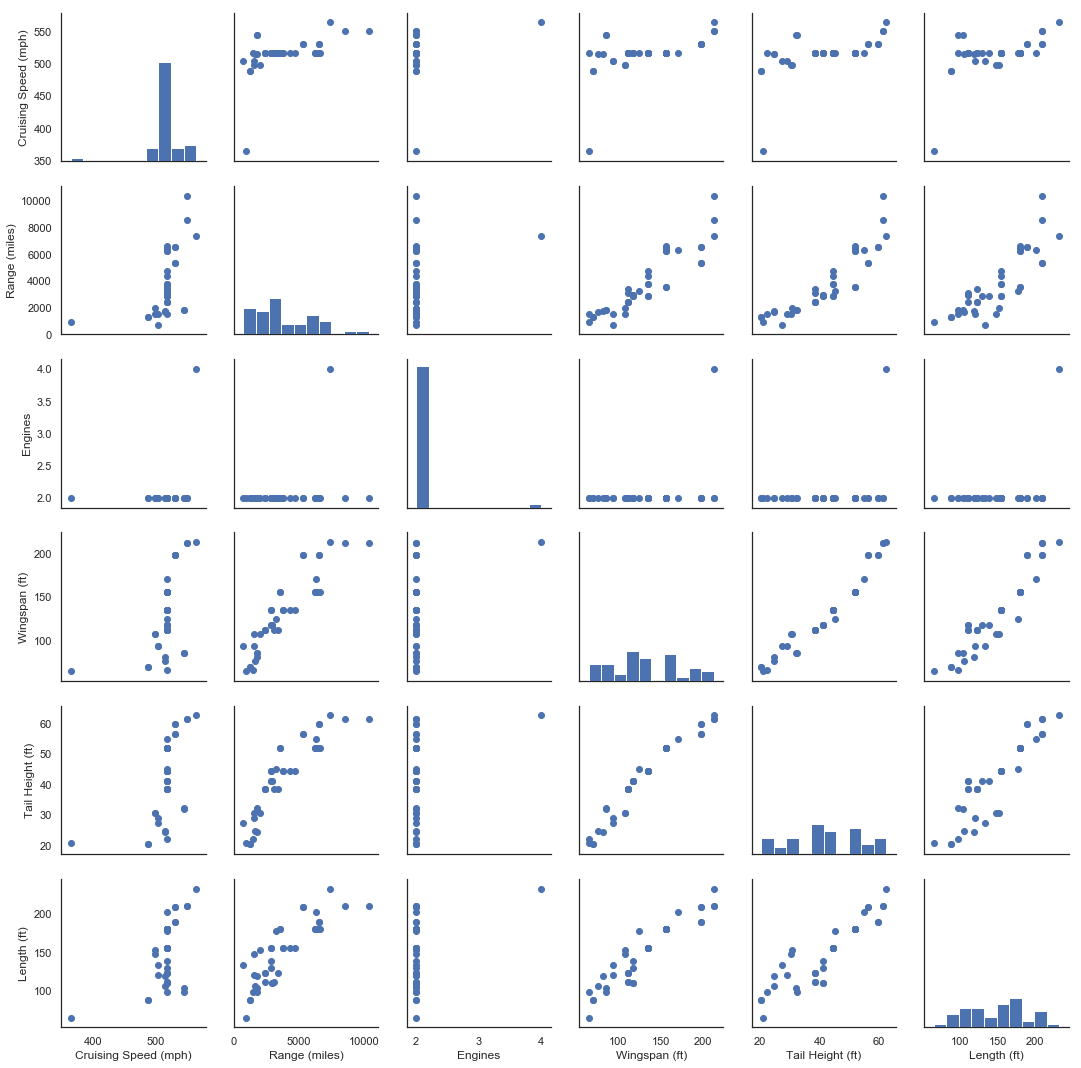

In [112]:
pg = plot_pairgrid(df) #your answer should look like this

We observe that pretty strong positive correlations between all these variables, as most of them are related to the aircraft’s overall size. Remarkably there is an almost perfectly linear relationship between wingspan and tail height.

The exception here is engines. There is one outlier which has four engines, while all the other aircraft have two. In this way the engines variable is really more like a categorical variable, but we shall as the analysis progresses that this is not really important, as there are other variables which more strongly discern the aircraft from one another than this.

In [113]:
### This is the unittest cell, please just run this cell without any modification once you generated "pg" above

cols = ['Cruising Speed (mph)', 'Range (miles)', 'Engines',
        'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)']

assert_is_instance(pg.fig, plt.Figure)
assert_equal(set(pg.data.columns), set(cols))

for ax in pg.diag_axes:
    assert_equal(len(ax.patches), 10)

for i, j in zip(*np.triu_indices_from(pg.axes, 1)):
    ax = pg.axes[i, j]
    x_in = df[cols[j]]
    y_in = df[cols[i]]
    x_out, y_out = ax.collections[0].get_offsets().T
    assert_array_equal(x_in, x_out)
    assert_array_equal(y_in, y_out)

for i, j in zip(*np.tril_indices_from(pg.axes, -1)):
    ax = pg.axes[i, j]
    x_in = df[cols[j]]
    y_in = df[cols[i]]
    x_out, y_out = ax.collections[0].get_offsets().T
    assert_array_equal(x_in, x_out)
    assert_array_equal(y_in, y_out)

for i, j in zip(*np.diag_indices_from(pg.axes)):
    ax = pg.axes[i, j]
    assert_equal(len(ax.collections), 0)

#### Apply PCA
I assume we dont know anything about dimensionality reduction techniques and just naively apply principle components to the data.

Write a function named fit_pca() that takes a pandas.DataFrame and uses [sklearn.decomposition.PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to fit a PCA model on all values of df.

In [114]:
def fit_pca(df, n_components):
    '''
    Uses sklearn.decomposition.PCA to fit a PCA model on "df".
    
    Parameters
    ----------
    df: A pandas.DataFrame. Comes from delta.csv.
    n_components: An int. Number of principal components to keep.
    
    Returns
    -------
    An sklearn.decomposition.pca.PCA instance.
    '''
    
    # YOUR CODE HERE
    pca = PCA(n_components=n_components).fit(df)

    return pca

In [115]:
# we keep all components by setting n_components = no of cols in df. FYI df.shape[0] returns # of rows, len(df.columns) also works similar
pca_naive = fit_pca(df, n_components=df.shape[1])

In [116]:
assert_is_instance(pca_naive, PCA)
assert_almost_equal(pca_naive.explained_variance_ratio_.sum(), 1.0, 3)
assert_equal(pca_naive.n_components_, df.shape[1])
assert_equal(pca_naive.whiten, False)

In [117]:
def plot_naive_variance(pca):
    '''
    Plots the variance explained by each of the principal components.
    Attributes are not scaled, hence a naive approach.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.pca.PCA instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    fig, ax = plt.subplots(figsize=(10,6))

    # Decorate the plot
    #ax.lim(0,30)
    ax.set_xlabel('Dimension #')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title('Fraction of Explained Variance')
    ax.plot(pca.explained_variance_ratio_)


    return ax

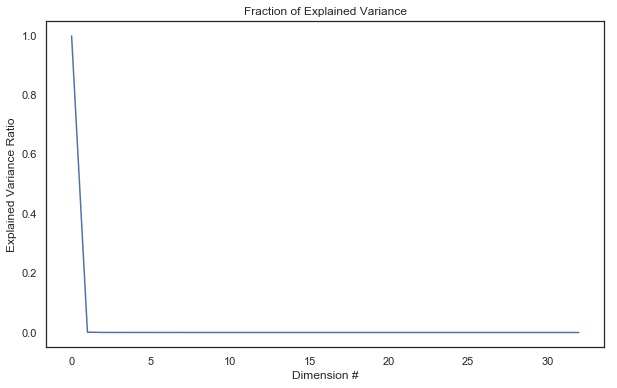

In [118]:
naive_var = plot_naive_variance(pca_naive)

In [119]:
assert_is_instance(naive_var, mpl.axes.Axes)
assert_equal(len(naive_var.lines), 1)

assert_is_not(len(naive_var.title.get_text()), 0,
    msg="Your plot doesn't have a title.")
assert_is_not(naive_var.xaxis.get_label_text(), '',
    msg="Change the x-axis label to something more descriptive.")
assert_is_not(naive_var.yaxis.get_label_text(), '',
    msg="Change the y-axis label to something more descriptive.")

xdata, ydata = naive_var.lines[0].get_xydata().T
assert_array_equal(xdata, list(range(df.shape[1])))
assert_array_almost_equal(ydata, pca_naive.explained_variance_ratio_)

In [120]:
abs_val = np.abs(pca_naive.components_[0])
max_pos = abs_val.argmax()
max_val = abs_val.max()

print('"{0}" accounts for {1:0.3f} % of the variance.'.format(df.columns[max_pos], max_val))

"Range (miles)" accounts for 0.999 % of the variance.


Taking this naive approach, we can see that the first principal component accounts for 99.9% of the variance in the data. (Note the y-axis is on a log scale.) Looking more closely, can we see that the first principle component is just the range in miles? This is because the scale of the different variables in the data set is quite variable.

PCA is a scale-dependent method. For example, if the range of one column is [-100, 100], while the that of another column is [-0.1, 0.1], PCA will place more weight on the feature with larger values. One way to avoid this is to standardize a data set by scaling each feature so that the individual features all look like Gausssian distributions with zero mean and unit variance. 

Please write a function named standardize() where StandardScaler function of sklearn will be used to scale each feature so that they have zero mean and unit variance.

In [121]:
def standardize(df):
    '''
    Uses sklearn.preprocessing.StandardScaler to make each features look like
    a Gaussian with zero mean and unit variance.
    
    Parameters
    ----------
    df: A pandas.DataFrame
    
    Returns
    -------
    A numpy array.
    '''
    
    # YOUR CODE HERE
    # Create scaler: scaler
    stscaler = StandardScaler().fit(df)
    scaled = stscaler.transform(df)

    
    
    return scaled

In [122]:
scaled = standardize(df)


In [123]:
rng = np.random.RandomState(0)
n_samples, n_features = 4, 5

df_t1 = pd.DataFrame(
    rng.randn(n_samples, n_features),
    index=[i for i in 'abcd'],
    columns=[c for c  in 'abcde']
    )
df_t1.loc[:, 'a'] = 0.0  # make first feature zero

scaled_t1 = standardize(df_t1)

assert_is_not(df_t1, scaled_t1)
assert_is_instance(scaled_t1, np.ndarray)
assert_array_almost_equal(
    scaled_t1.mean(axis=0),
    n_features * [0.0] # scaled data should have mean zero
    ) 
assert_array_almost_equal(
    scaled_t1.std(axis=0),
    [0., 1., 1., 1., 1.] # unit variance except for 1st feature
    )

In [124]:
# we keep only 10 components
n_components = 10
pca = fit_pca(scaled, n_components=n_components)

Let's take another look to the explained variance of the first 10 principal components from the scaled data.

In [125]:
def plot_scaled_variance(pca):
    '''
    Plots the variance explained by each of the principal components.
    Features are scaled with sklearn.StandardScaler.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.pca.PCA instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    fig, ax = plt.subplots(figsize=(10,6))

    # Decorate the plot
    #ax.lim(0,30)
    ax.set_xlabel('Dimension #')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title('Fraction of Explained Variance')
    ax.plot(pca.explained_variance_ratio_)
    
    
    
    return ax

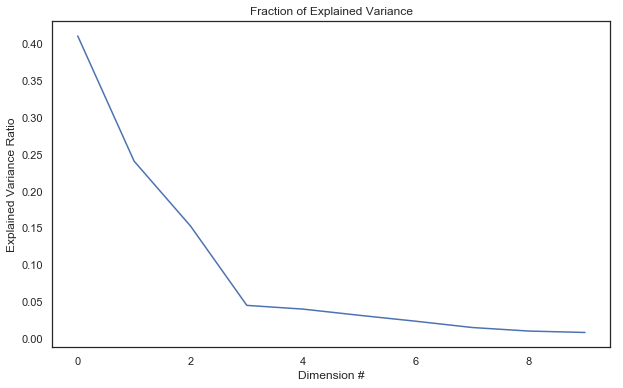

In [126]:
ax = plot_scaled_variance(pca)

In [127]:
assert_is_instance(ax, mpl.axes.Axes)
assert_equal(len(ax.lines), 1)

assert_is_not(len(ax.title.get_text()), 0, msg="Your plot doesn't have a title.")
assert_is_not(ax.xaxis.get_label_text(), '', msg="Change the x-axis label to something more descriptive.")
assert_is_not(ax.yaxis.get_label_text(), '', msg="Change the y-axis label to something more descriptive.")

xdata, ydata = ax.lines[0].get_xydata().T
assert_array_equal(xdata, list(range(n_components)))
assert_array_almost_equal(ydata, pca.explained_variance_ratio_)

Nice, it looks good to go. There are various rules of thumb for selecting the number of principal components to retain in an analysis of this type, one of which I’ve experienced about is:

Pick the number of components which explain 85% or greater of the variation.
So, we will keep the first 4 principal components (remember that we are counting from zero, so we are keeping 0th, 1st, 2nd, and 3rd components—four components). Later in this assignment, we will use these four components to fit a $k$-means model. Before we move on to the next problem, let's apply the dimensional reduction on the scaled data. (In the previous sections, we didn't actually have to apply  transform(). This step is to make sure that the scaled data is actually "transformed".)

Write a function named reduce() that takes a PCA model (that is already trained on array) and a Numpy array, and applies dimensional reduction on the array.

In [128]:
def reduce(pca, array):
    '''
    Applies the `pca` model on array.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.PCA instance.
    
    Returns
    -------
    A Numpy array
    '''
    
    # YOUR CODE HERE
    reduced = pca.transform(array)

    
    return reduced

In [129]:
reduced = reduce(pca, scaled)
print(reduced.shape)

(44, 10)


In [130]:
assert_is_instance(reduced, np.ndarray)
assert_array_almost_equal(reduced, pca.fit_transform(scaled))

In [131]:
# Save the reduced data to the same directory of your notebook  as 'delta_reeuced.npy' that we will use later on
np.save('delta_reduced.npy', reduced)

-----------

### Problem 2. Clustering

We will use the first 10 principal components of the Delta Airline data set that we created in the first step.


In [132]:
##Standard imports just in case

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

from sklearn.utils import check_random_state
from sklearn.cluster import KMeans

from nose.tools import assert_equal, assert_is_instance, assert_true, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal

In [133]:
## Reload the the first 10 components of delta dataset
reduced = np.load('delta_reduced.npy')


Write a function named cluster() that fits a k-means clustering algorithm, and returns a tuple (sklearn.cluster.k_means_.KMeans, np.array). The second element of the tuple is a 1-d array that contains the predictions of k-means clustering, i.e. which cluster each data point belongs to. Please remember how we were generating and using the labels for seeds, movements, iris etc.


Use default values for all parameters in KMeans() execept for n_clusters and random_state.

In [134]:
def cluster(array, random_state, n_clusters=4):
    '''
    Fits and predicts k-means clustering on "array"
    
    Parameters
    ----------
    array: A numpy array
    random_state: Random seed, e.g. check_random_state(0)
    n_clusters: The number of clusters. Default: 4
    
    Returns
    -------
    A tuple (sklearn.KMeans, np.ndarray)
    '''
    model = KMeans(n_clusters=n_clusters,
                   random_state=check_random_state(0))
    clusters = model.fit_predict(array)
   
    
    return model, clusters

#here we return fitted (model) and predicted (clusters) arrays as a tuple

In [135]:
k_means_t, cluster_t = cluster(reduced, random_state=check_random_state(1), 
                               n_clusters=5)

assert_is_instance(k_means_t, sklearn.cluster.k_means_.KMeans)
assert_is_instance(cluster_t, np.ndarray)
assert_equal(k_means_t.n_init, 10)
assert_equal(k_means_t.n_clusters, 5)
assert_equal(len(cluster_t), len(reduced))
assert_true((cluster_t < 5).all()) # n_cluster = 5 so labels should be between 0 and 5
assert_true((cluster_t >= 0).all())
labels_gold = -1. * np.ones(len(reduced), dtype=np.int)
mindist = np.empty(len(reduced))
mindist.fill(np.infty)
for i in range(5):
    dist = np.sum((reduced - k_means_t.cluster_centers_[i])**2., axis=1)
    labels_gold[dist < mindist] = i
    mindist = np.minimum(dist, mindist)
assert_true((mindist >= 0.0).all())
assert_true((labels_gold != -1).all())
assert_array_equal(labels_gold, cluster_t)

The scikit-learn documentation on sklearn.cluster.KMeans says that [Kmeans cluster](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) has the inertia value in the inertia_ attribute. So we can vary the number of clusters in KMeans, plot KMeans.inertia_ as a function of the number of clusters, and pick the "elbow" in the plot.

Always use check_random_state(0) to seed the random number generator.


In [136]:
def plot_inertia(array, start=1, end=10):
    '''
    Increase the number of clusters from "start" to "end" (inclusive).
    Finds the inertia of k-means clustering for different k.
    Plots inertia as a function of the number of clusters.

    
    Parameters
    ----------
    array: A numpy array.
    start: An int. Default: 1
    end: An int. Default: 10
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    #Your code is here
    inertia = []
    
    i = start
    while i <= end:
        kmeans = KMeans(n_clusters =i , 
                        random_state=check_random_state(0))
        kmeans.fit(array)
        inertia.append(kmeans.inertia_)
        i += 1
        
    
    x_axis = np.linspace(start, end, 10)
    
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.set_title('The elbow method')
    ax.set_ylabel('Inertia')
    ax.set_xlabel('Number of clusters')
    plt.plot(x_axis, inertia)

    return ax

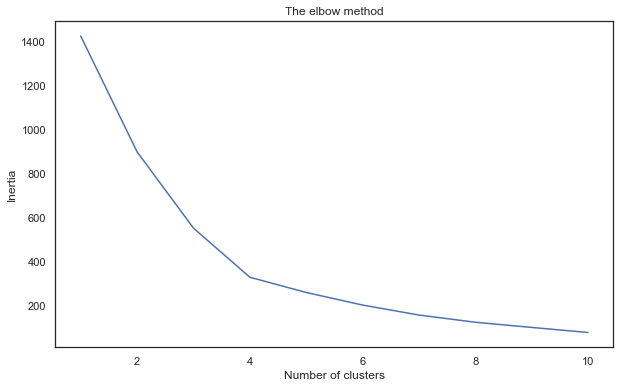

In [137]:
inertia = plot_inertia(reduced)

In [138]:
assert_is_instance(inertia, mpl.axes.Axes)
assert_true(len(inertia.lines) >= 1)

xdata, ydata = inertia.lines[0].get_xydata().T

for i in range(1, 11):
    k_means_t, cluster_t = cluster(reduced, random_state=check_random_state(0), 
                                   n_clusters=i)
    assert_array_equal(xdata[i - 1], i)
    assert_almost_equal(ydata[i - 1], k_means_t.inertia_)

assert_is_not(len(inertia.title.get_text()), 0,
    msg="Your plot doesn't have a title.")
assert_is_not(inertia.xaxis.get_label_text(), '',
    msg="Change the x-axis label to something more descriptive.")
assert_is_not(inertia.yaxis.get_label_text(), '',
    msg="Change the y-axis label to something more descriptive.")

In [139]:
def plot_pair(reduced, clusters):
    '''
    Uses seaborn.PairGrid to visualize the data distribution
    when axes are the first four principal components.
    Diagonal plots are histograms. The off-diagonal plots are scatter plots.
    
    Parameters
    ----------
    reduced: A numpy array. Comes from importing delta_reduced.npy
    
    Returns
    -------
    A seaborn.axisgrid.PairGrid instance.
    '''
    
    df = pd.DataFrame(reduced)
    df['c'] = clusters
    subset = [0,1,2,3, 'c']
    columns = [0,1,2,3]
    
    ax = sns.PairGrid(df[subset], vars = columns, hue = 'c')
    ax = ax.map_diag(plt.hist)
    ax = ax.map_offdiag(plt.scatter)
    
    return ax

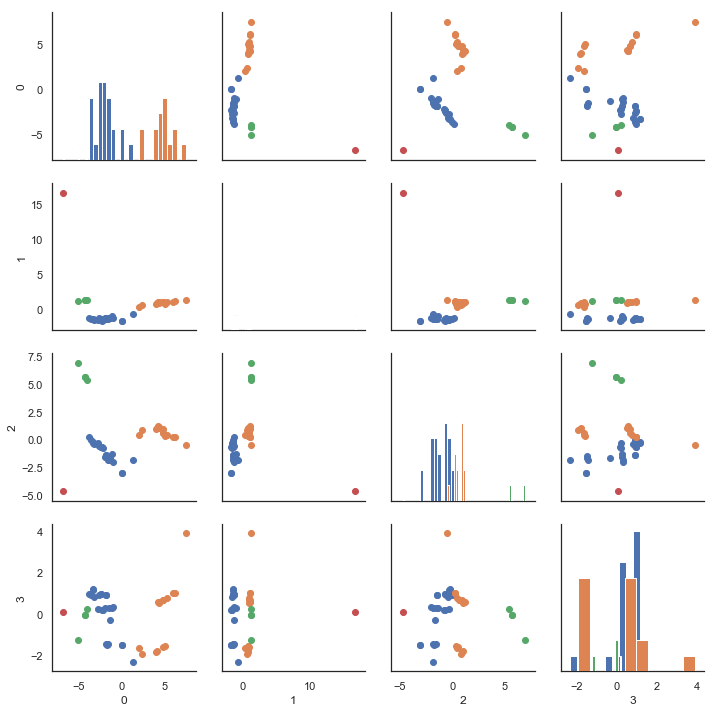

In [140]:
k_means, clusters = cluster(reduced, random_state=check_random_state(0), 
                            n_clusters=4)
pg = plot_pair(reduced, clusters)

We observe that the one outlier is in its own cluster, there’s 3 or 4 points in the other clusters and the remainder are split into two clusters of greater size.

In [141]:
assert_is_instance(pg.fig, plt.Figure)
assert_true(len(pg.data.columns) >= 4)

for ax in pg.diag_axes:
    assert_equal(len(ax.patches), 4 * 10) # 4 clusters with 10 patches in each histogram

for i, j in zip(*np.triu_indices_from(pg.axes, 1)):
    ax = pg.axes[i, j]
    x_out, y_out = ax.collections[0].get_offsets().T
    x_in = reduced[clusters == 0, j] # we only check the first cluster
    y_in = reduced[clusters == 0, i]
    assert_array_equal(x_in, x_out)
    assert_array_equal(y_in, y_out)

for i, j in zip(*np.tril_indices_from(pg.axes, -1)):
    ax = pg.axes[i, j]
    x_in = reduced[clusters == 0, j]
    y_in = reduced[clusters == 0, i]
    x_out, y_out = ax.collections[0].get_offsets().T
    assert_array_equal(x_in, x_out)
    assert_array_equal(y_in, y_out)

for i, j in zip(*np.diag_indices_from(pg.axes)):
    ax = pg.axes[i, j]
    assert_equal(len(ax.collections), 0)

#### Let's Continue our Analysis and brainstorm
You don't have to write any code in this section, but here's one interpretaion of what we have done.

Let's take a closer look at each cluster.

In [142]:

df = pd.read_csv('delta.csv', index_col='Aircraft')
df['Clusters'] = clusters
df['Aircraft'] = df.index
df_grouped = df.groupby('Clusters').mean()
print(df_grouped.Accommodation)

Clusters
0    153.625000
1    244.733333
2     44.500000
3     54.000000
Name: Accommodation, dtype: float64


In [143]:
print(df_grouped['Length (ft)'])

Clusters
0    137.048083
1    190.538400
2     84.810750
3    111.000000
Name: Length (ft), dtype: float64


Cluster 3 has only one aircraft:

In [144]:
clust3 = df[df.Clusters == 3]
print(clust3.Aircraft)

Aircraft
Airbus A319 VIP    Airbus A319 VIP
Name: Aircraft, dtype: object


Airbus A319 VIP is not one of Delta Airline's regular fleet and is one of Airbus corporate jets.

Cluster 2 has four aircrafts.

In [145]:
clust2 = df[df.Clusters == 2]
print(clust2.Aircraft)

Aircraft
CRJ 100/200 Pinnacle/SkyWest    CRJ 100/200 Pinnacle/SkyWest
CRJ 100/200 ExpressJet                CRJ 100/200 ExpressJet
E120                                                    E120
ERJ-145                                              ERJ-145
Name: Aircraft, dtype: object


These are small aircrafts and only have economy seats.

In [146]:
cols_seat = ['First Class', 'Business', 'Eco Comfort', 'Economy']
print(df.loc[clust2.index, cols_seat])

                              First Class  Business  Eco Comfort  Economy
Aircraft                                                                 
CRJ 100/200 Pinnacle/SkyWest            0         0            0        1
CRJ 100/200 ExpressJet                  0         0            0        1
E120                                    0         0            0        1
ERJ-145                                 0         0            0        1


In [147]:
clust1 = df[df.Clusters == 1]
print(clust1.Aircraft)

Aircraft
Airbus A330-200                      Airbus A330-200
Airbus A330-200 (3L2)          Airbus A330-200 (3L2)
Airbus A330-200 (3L3)          Airbus A330-200 (3L3)
Airbus A330-300                      Airbus A330-300
Boeing 747-400 (74S)            Boeing 747-400 (74S)
Boeing 757-200 (75E)            Boeing 757-200 (75E)
Boeing 757-200 (75X)            Boeing 757-200 (75X)
Boeing 767-300 (76G)            Boeing 767-300 (76G)
Boeing 767-300 (76L)            Boeing 767-300 (76L)
Boeing 767-300 (76T)            Boeing 767-300 (76T)
Boeing 767-300 (76Z V.1)    Boeing 767-300 (76Z V.1)
Boeing 767-300 (76Z V.2)    Boeing 767-300 (76Z V.2)
Boeing 767-400 (76D)            Boeing 767-400 (76D)
Boeing 777-200ER                    Boeing 777-200ER
Boeing 777-200LR                    Boeing 777-200LR
Name: Aircraft, dtype: object


Interesting, Cluster 1 aircrafts do not have first class seating.



In [148]:
print(df.loc[clust1.index, cols_seat])

                          First Class  Business  Eco Comfort  Economy
Aircraft                                                             
Airbus A330-200                     0         1            1        1
Airbus A330-200 (3L2)               0         1            1        1
Airbus A330-200 (3L3)               0         1            1        1
Airbus A330-300                     0         1            1        1
Boeing 747-400 (74S)                0         1            1        1
Boeing 757-200 (75E)                0         1            1        1
Boeing 757-200 (75X)                0         1            1        1
Boeing 767-300 (76G)                0         1            1        1
Boeing 767-300 (76L)                0         1            1        1
Boeing 767-300 (76T)                0         1            1        1
Boeing 767-300 (76Z V.1)            0         1            1        1
Boeing 767-300 (76Z V.2)            0         1            1        1
Boeing 767-400 (76D)

In [149]:
clust0 = df[df.Clusters == 0]
print(clust0.Aircraft)

Aircraft
Airbus A319                          Airbus A319
Airbus A320                          Airbus A320
Airbus A320 32-R                Airbus A320 32-R
Boeing 717                            Boeing 717
Boeing 737-700 (73W)        Boeing 737-700 (73W)
Boeing 737-800 (738)        Boeing 737-800 (738)
Boeing 737-800 (73H)        Boeing 737-800 (73H)
Boeing 737-900ER (739)    Boeing 737-900ER (739)
Boeing 757-200 (75A)        Boeing 757-200 (75A)
Boeing 757-200 (75M)        Boeing 757-200 (75M)
Boeing 757-200 (75N)        Boeing 757-200 (75N)
Boeing 757-200 (757)        Boeing 757-200 (757)
Boeing 757-200 (75V)        Boeing 757-200 (75V)
Boeing 757-300                    Boeing 757-300
Boeing 767-300 (76P)        Boeing 767-300 (76P)
Boeing 767-300 (76Q)        Boeing 767-300 (76Q)
Boeing 767-300 (76U)        Boeing 767-300 (76U)
CRJ 700                                  CRJ 700
CRJ 900                                  CRJ 900
E170                                        E170
E175       

The aircrafts in cluster 0 (except for one aircraft) have first class seating but no business class.



In [150]:
print(df.loc[clust0.index, cols_seat])

                        First Class  Business  Eco Comfort  Economy
Aircraft                                                           
Airbus A319                       1         0            1        1
Airbus A320                       1         0            1        1
Airbus A320 32-R                  1         0            1        1
Boeing 717                        1         0            1        1
Boeing 737-700 (73W)              1         0            1        1
Boeing 737-800 (738)              1         0            1        1
Boeing 737-800 (73H)              1         0            1        1
Boeing 737-900ER (739)            1         0            1        1
Boeing 757-200 (75A)              1         0            1        1
Boeing 757-200 (75M)              1         0            1        1
Boeing 757-200 (75N)              1         0            1        1
Boeing 757-200 (757)              1         0            1        1
Boeing 757-200 (75V)              1         0   

---------------------

### Problem 3
(No Unit Tests in this portion)

Run DBSCAN on Iris.csv and compare/discuss the results with K-Means. Please submit your code and output, and write down 3-4 sentences that you observed from the results.


Run DBSCAN on Reduced_Delta dataset and compare/discuss the results with K-Means. Please submit your code and output, and write down 3-4 sentences that you observed from the results.

Run KMeans on movements.csv compare/discuss the results with DBSCAN and Hierarchical Clustering (Agglomerative). Please submit your code and output, and write down 3-4 sentences that you observed from the results


## DBSCAN on Iris

Estimated number of clusters: 2
35


Text(0, 0.5, '')

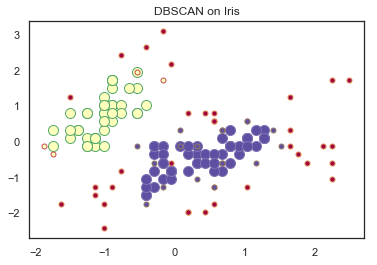

In [151]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
dataset = pd.read_csv('Iris.csv')

iris = dataset.iloc[:, [1, 2, 3, 4]].values
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris, y=None)
dbsc = DBSCAN(eps = 0.5, min_samples = 5).fit(iris_scaled)

labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print(n_noise_)

unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = iris_scaled[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, 
             markersize = 10)
    
    xy2 = iris_scaled[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, 
             markersize = 5)
plt.title("DBSCAN on Iris")
plt.xlabel("")
plt.ylabel("")


Text(0.5, 1.0, 'DBSCAN')

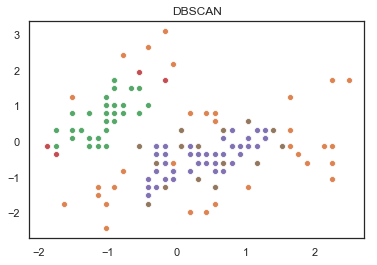

In [152]:
# Using the scatter function in the updated seaborn package
# Using scatter function directly from the seaborn package

for label in unique_labels:
    class_member_mask = (labels == label)
    xy = iris_scaled[class_member_mask & core_samples]
    sns.scatterplot(xy[:,0],xy[:,1])
    
    xy2 = iris_scaled[class_member_mask & ~core_samples]    
    sns.scatterplot(xy2[:,0],xy2[:,1])
plt.title("DBSCAN")

## K-Means on Iris

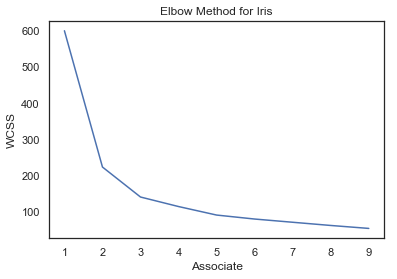

In [153]:
from sklearn.preprocessing import normalize

wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                     max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(iris_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method for Iris')
plt.xlabel('Associate')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

The critical marginal point locates when k = 5. I would like to choose k=5, which means I will cluster these points into 5 clusters.

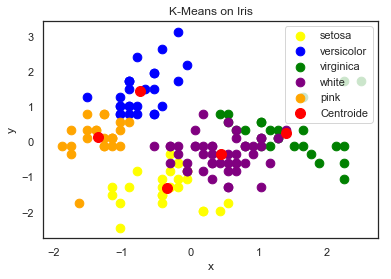

In [154]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(iris_scaled)

#Visualising the clusters
plt.scatter(iris_scaled[y_kmeans == 0, 0], iris_scaled[y_kmeans == 0, 1], 
            s = 75, c = 'yellow', label = 'setosa')
plt.scatter(iris_scaled[y_kmeans == 1, 0], iris_scaled[y_kmeans == 1, 1], 
            s = 75, c = 'blue', label = 'versicolor')
plt.scatter(iris_scaled[y_kmeans == 2, 0], iris_scaled[y_kmeans == 2, 1], 
            s = 75, c = 'green', label = 'virginica')
plt.scatter(iris_scaled[y_kmeans == 3, 0], iris_scaled[y_kmeans == 3, 1], 
            s = 75, c = 'purple', label = 'white')
plt.scatter(iris_scaled[y_kmeans == 4, 0], iris_scaled[y_kmeans == 4, 1], 
            s = 75, c = 'orange', label = 'pink')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], s = 100, 
            c = 'red', label = 'Centroide')
plt.title("K-Means on Iris")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

Text(0, 0.5, 'y')

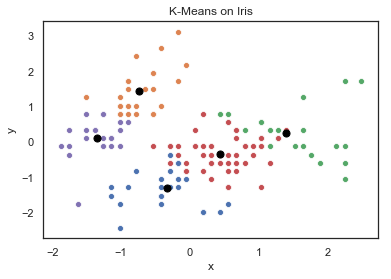

In [155]:
# Using the scatter function in the updated seaborn package
# Using scatter function directly from the seaborn package

for i in range(0,5):
    sns.scatterplot(iris_scaled[y_kmeans == i, 0], 
                    iris_scaled[y_kmeans == i, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], s = 50, 
            c = 'black')
plt.title("K-Means on Iris")
plt.xlabel("x")
plt.ylabel("y")


Interpretation for "Iris": I like DBSCAN clustering more than K-means clustering though both diagrams look pretty good and reasonable. However, the K-means clustering method will not be able to show us outliers since it will put every point into the closest cluster by calculating the Euclidean distance. DBSCAN clustering can clearly indicate the core points, border points, and noise points(outliers). DBSCAN can also find the non-linearly separable clusters, which k-means may not be able to adequately cluster. (4 sentences)

--------------------

## DBSCAN on delta_reduced

Estimated number of clusters: 1
1


Text(0, 0.5, 'y')

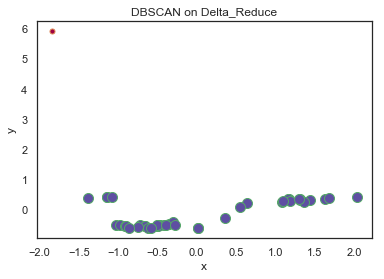

In [156]:
reduced = np.load('delta_reduced.npy')

scaler = StandardScaler()
reduced_scaled = scaler.fit_transform(reduced, y=None)
dbsc = DBSCAN(eps = 6.785, min_samples = 2).fit(reduced_scaled)

labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print(n_noise_)

unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = reduced_scaled[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, 
             markersize = 10)
    
    xy2 = reduced_scaled[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, 
             markersize = 5)
plt.title("DBSCAN on Delta_Reduce")
plt.xlabel("x")
plt.ylabel("y")


If I set and require epsilon too small and min_points to have too many, every point will become an outlier.  

Conversely, if I set and require epsilon too big and min_points to have too less, every point will become a core point.   

I choosed a compromised epsilon and min_points to make the plot reasonable. Now I only have one further outlier point in this case.


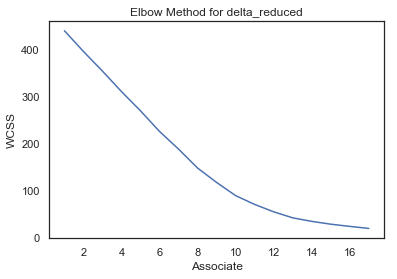

In [157]:
wcss2 = []

for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                     max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(reduced_scaled)
    wcss2.append(kmeans.inertia_)
    
plt.plot(range(1, 18), wcss2)
plt.title('Elbow Method for delta_reduced')
plt.xlabel('Associate')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

It seems that the critical marginal point locates at k = 10 or 12. I don't want to cluster these points into too many numbers of clusters. I choose k = 10 in this case.

Text(0, 0.5, 'y')

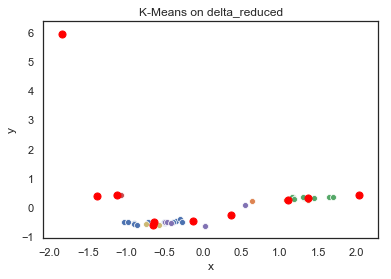

In [158]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(reduced_scaled)

for i in range(0,11):
    sns.scatterplot(reduced_scaled[y_kmeans == i, 0], 
                    reduced_scaled[y_kmeans == i, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], s = 50, 
            c = 'red')
plt.title("K-Means on delta_reduced")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

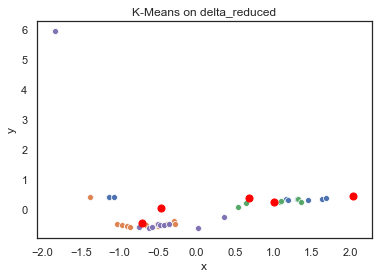

In [159]:
# I want to see the plots if I cluster these points into a less number of clusters.
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(reduced_scaled)

for i in range(0,11):
    sns.scatterplot(reduced_scaled[y_kmeans == i, 0], 
                    reduced_scaled[y_kmeans == i, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], s = 50, 
            c = 'red')
plt.title("K-Means on delta_reduced")
plt.xlabel("x")
plt.ylabel("y")

Interpretation for "delta_reduced": I like DBSCAN clustering more than K-means clustering though both diagrams are messy, and it is tough to classify these points into clusters directly. However, k-means will not be able to show us outliers, so the obviously further outlier point will still be classified into the closest cluster. DBSCAN clustering could show us a more accurate result by adjusting min_points and epsilon. I like DBSCAN more than k-means in this case due to the accuracy that matches better to the visualization from my eyes. (4 sentences)

## K-means on movements

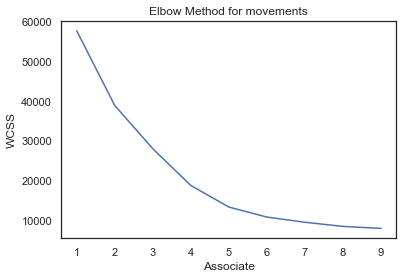

In [160]:
movements = pd.read_csv('movements.csv',header=None, index_col=False, 
                        skiprows=1, usecols=range(1,964))

scaler = StandardScaler()
mv_scaled = scaler.fit_transform(movements, y=None)

wcss3 = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                     max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(mv_scaled)
    wcss3.append(kmeans.inertia_)
    
plt.plot(range(1, 10), wcss3)
plt.title('Elbow Method for movements')
plt.xlabel('Associate')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

It seems that the critical marginal point locates at k = 6. I choose k = 6, which means I will cluster these points into 6 clusters.

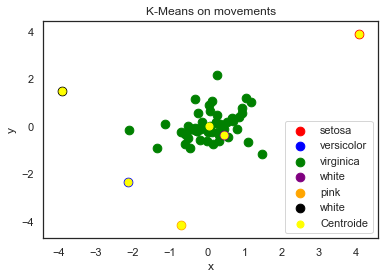

In [190]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(mv_scaled)

#Visualising the clusters
plt.scatter(mv_scaled[y_kmeans == 0, 0], mv_scaled[y_kmeans == 0, 1], 
            s = 75, c = 'red', label = 'setosa')
plt.scatter(mv_scaled[y_kmeans == 1, 0], mv_scaled[y_kmeans == 1, 1], 
            s = 75, c = 'blue', label = 'versicolor')
plt.scatter(mv_scaled[y_kmeans == 2, 0], mv_scaled[y_kmeans == 2, 1], 
            s = 75, c = 'green', label = 'virginica')
plt.scatter(mv_scaled[y_kmeans == 3, 0], mv_scaled[y_kmeans == 3, 1], 
            s = 75, c = 'purple', label = 'white')
plt.scatter(mv_scaled[y_kmeans == 4, 0], mv_scaled[y_kmeans == 4, 1], 
            s = 75, c = 'orange', label = 'pink')
plt.scatter(mv_scaled[y_kmeans == 5, 0], mv_scaled[y_kmeans == 5, 1], 
            s = 75, c = 'black', label = 'white')
#plt.scatter(mv_scaled[y_kmeans == 6, 0], mv_scaled[y_kmeans == 6, 1], 
#            s = 75, c = 'gray', label = 'white')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], s = 50, 
            c = 'yellow', label = 'Centroide')
plt.title("K-Means on movements")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

Text(0, 0.5, 'y')

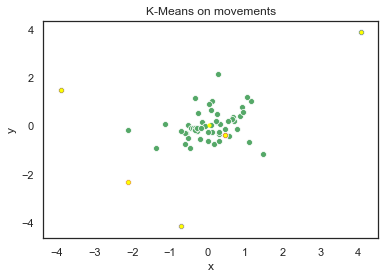

In [191]:
# Using the scatter function in the updated seaborn package

for i in range(0,6):
    sns.scatterplot(mv_scaled[y_kmeans == i, 0], 
                    mv_scaled[y_kmeans == i, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], s = 10, 
            c = 'yellow')
plt.title("K-Means on movements")
plt.xlabel("x")
plt.ylabel("y")

## DBSCAN on movements

Estimated number of clusters: 1
42


Text(0, 0.5, 'y')

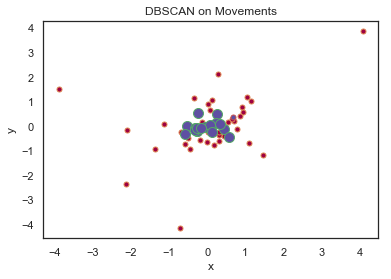

In [163]:
dbsc = DBSCAN(eps = 8, min_samples = 3).fit(mv_scaled)

labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print(n_noise_)

unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = mv_scaled[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, 
             markersize = 10)
    
    xy2 = mv_scaled[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, 
             markersize = 5)
plt.title("DBSCAN on Movements")
plt.xlabel("x")
plt.ylabel("y")

There are core points in the center and outliers(small dots) around the center.

Estimated number of clusters: 1
22


Text(0, 0.5, 'y')

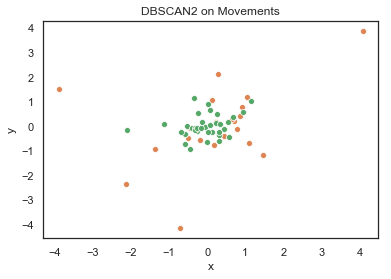

In [164]:
# Using the scatter function in the updated seaborn package
# Using scatter function directly from the seaborn package

dbsc = DBSCAN(eps = 15, min_samples = 2).fit(mv_scaled)
labels = dbsc.labels_

core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print(n_noise_)


unique_labels = np.unique(labels)

for label in unique_labels:
    class_member_mask = (labels == label)
    xy = mv_scaled[class_member_mask & core_samples]
    sns.scatterplot(xy[:,0],xy[:,1])
    
    xy2 = mv_scaled[class_member_mask & ~core_samples]    
    sns.scatterplot(xy2[:,0],xy2[:,1])
plt.title("DBSCAN2 on Movements")
plt.xlabel("x")
plt.ylabel("y")

(Every point becomes an outlier in this case)

K-means method links every single point including far outliers into the closest cluster. For DBSCAN, it is difficult to find the most appropriate epsilon value and min_points value. Otherwise, we will have only a few core points with abundant(too many) outliers, and sometimes every point is an outlier. These are not accurate and much different from what I observed by my eyes. (4 sentences)

## Hierarchical Clustering (Agglomerative) on movements

In [165]:
companies=['Apple',
 'AIG',
 'Amazon',
 'American express',
 'Boeing',
 'Bank of America',
 'British American Tobacco',
 'Canon',
 'Caterpillar',
 'Colgate-Palmolive',
 'ConocoPhillips',
 'Cisco',
 'Chevron',
 'DuPont de Nemours',
 'Dell',
 'Ford',
 'General Electrics',
 'Google/Alphabet',
 'Goldman Sachs',
 'GlaxoSmithKline',
 'Home Depot',
 'Honda',
 'HP',
 'IBM',
 'Intel',
 'Johnson & Johnson',
 'JPMorgan Chase',
 'Kimberly-Clark',
 'Coca Cola',
 'Lookheed Martin',
 'MasterCard',
 'McDonalds',
 '3M',
 'Microsoft',
 'Mitsubishi',
 'Navistar',
 'Northrop Grumman',
 'Novartis',
 'Pepsi',
 'Pfizer',
 'Procter Gamble',
 'Philip Morris',
 'Royal Dutch Shell',
 'SAP',
 'Schlumberger',
 'Sony',
 'Sanofi-Aventis',
 'Symantec',
 'Toyota',
 'Total',
 'Taiwan Semiconductor Manufacturing',
 'Texas instruments',
 'Unilever',
 'Valero Energy',
 'Walgreen',
 'Wells Fargo',
 'Wal-Mart',
 'Exxon',
 'Xerox',
 'Yahoo']

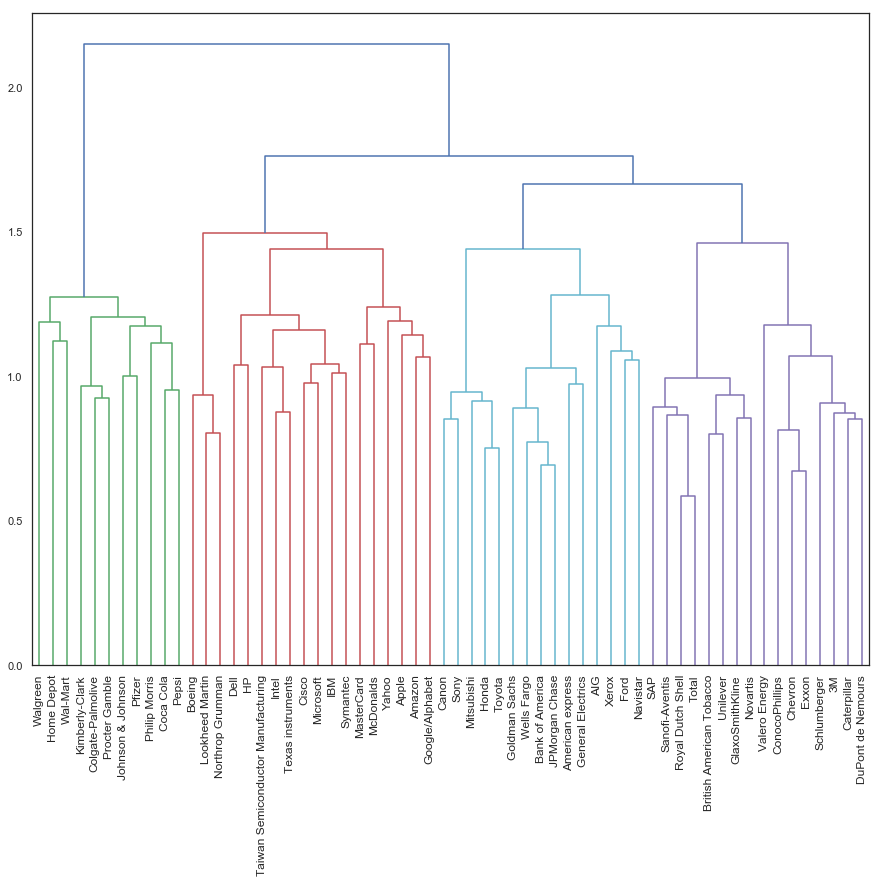

In [195]:
# I really like this graph by "ward" method after normalizing the data!
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram
df.shape

movementss=movements.values
# Any Pre-processing needed?
normalized_movements = normalize(movementss)
plt.figure(figsize=(15,12))

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='ward')
#ward, complete, single
#"Your code here"
# Plot the dendrogram
dendrogram(
    mergings,
    labels=companies,
    leaf_rotation=90.,
    leaf_font_size=12
)


#"Your code here"
plt.show()

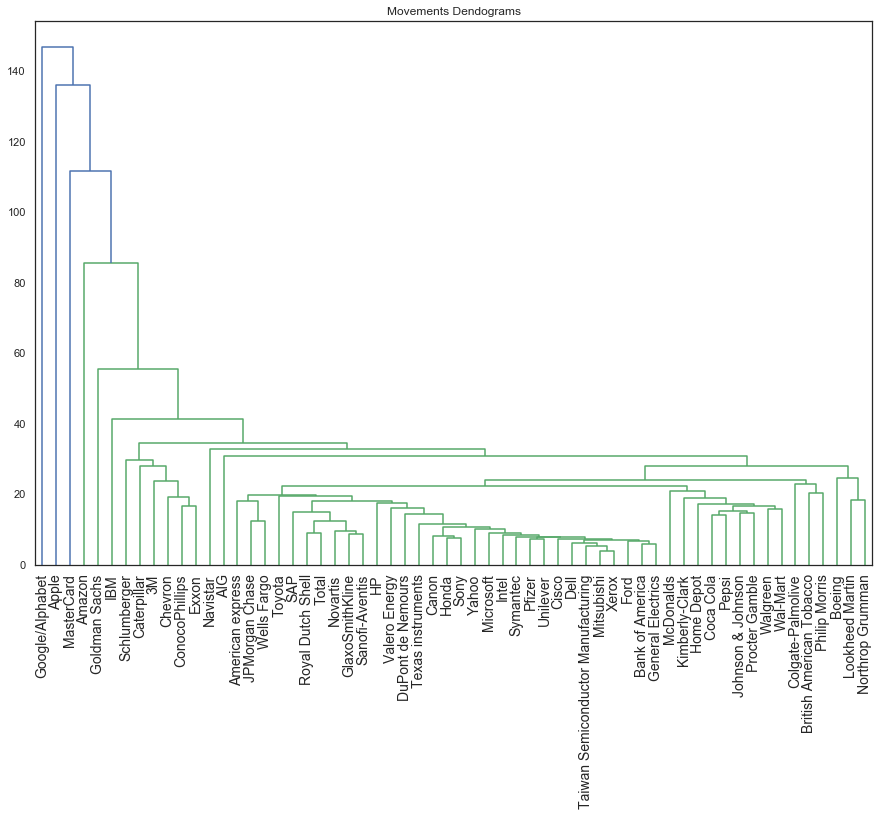

[4 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [167]:
# Another way for "complete" method
from scipy.cluster.hierarchy import linkage, dendrogram
df.shape
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

#dfs = normalize(mv_scaled)

plt.figure(figsize=(15, 10))  
plt.title("Movements Dendograms")
mergings = linkage(mv_scaled, method='complete')#ward)

labels = fcluster(mergings, 70, criterion='distance')
dendrogram(mergings,labels=companies,leaf_rotation=90,leaf_font_size=14)
plt.show()

print(labels)


In [196]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=12, 
                                  affinity='euclidean', linkage='ward')  
cluster.fit_predict(mv_scaled)  

array([ 7, 11,  9,  1,  4,  2,  1,  2,  0,  2,  1,  2,  1,  2,  2,  2,  2,
        5,  6,  2,  2,  2,  2,  8,  2,  2,  1,  2,  2,  4,  3,  2,  1,  2,
        2, 10,  4,  2,  2,  2,  2,  2,  1,  1,  0,  2,  2,  2,  1,  1,  2,
        2,  2,  2,  2,  1,  2,  1,  2,  2])

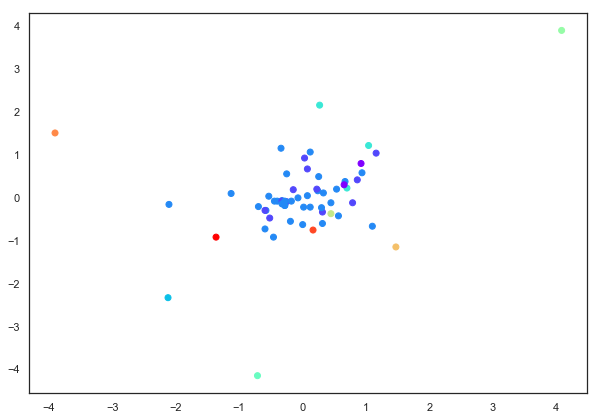

In [197]:
plt.figure(figsize=(10, 7))  
plt.scatter(mv_scaled[:,0], mv_scaled[:,1], 
            c=cluster.labels_, cmap='rainbow')  

Interpretation for "movements": For Hierarchical Clustering (Agglomerative), the cluster will add only one point or an element at a time by measuring the closest distance between the new adding point and the cluster. This method will continuously link and agglomerate every two sub-clusters into one bigger cluster step by step until we have one final cluster including every point. By looking at the graph, the hierarchical clustering graph increases layering with different colors from dark colors to bright colors (center to border), which matches our visual effect. (3 sentences)

Since both K-means and DBSCAN clustering's visualization are not as clear as hierarchical clustering. I like the hierarchical clustering method in this case. (1 sentence)

----------------

### Problem 4

Apply t-SNE reduction to delta.csv file and compare/discuss the results with PCA. Please submit your code and output, and write down 3-4 sentences that you observed from the results.

In [170]:
aircrafts=['Airbus A319',
 'Airbus A319 VIP',
 'Airbus A320',
 'Airbus A320 32-R',
 'Airbus A330-200',
 'Airbus A330-200 (3L2)',
 'Airbus A330-200 (3L3)',
 'Airbus A330-300',
 'Boeing 717',
 'Boeing 737-700 (73W)',
 'Boeing 737-800 (738)',
 'Boeing 737-800 (73H)',
 'Boeing 737-900ER (739)',
 'Boeing 747-400 (74S)',
 'Boeing 757-200 (75A)',
 'Boeing 757-200 (75E)',
 'Boeing 757-200 (75M)',
 'Boeing 757-200 (75N)',
 'Boeing 757-200 (757)',
 'Boeing 757-200 (75V)',
 'Boeing 757-200 (75X)',
 'Boeing 757-300',
 'Boeing 767-300 (76G)',
 'Boeing 767-300 (76L)',
 'Boeing 767-300 (76P)',
 'Boeing 767-300 (76Q)',
 'Boeing 767-300 (76T)',
 'Boeing 767-300 (76U)',
 'Boeing 767-300 (76Z V.1)',
 'Boeing 767-300 (76Z V.2)',
 'Boeing 767-400 (76D)',
 'Boeing 777-200ER',
 'Boeing 777-200LR',
 'CRJ 100/200 Pinnacle/SkyWest',
 'CRJ 100/200 ExpressJet',
 'CRJ 700',
 'CRJ 900',
 'E120',
 'E170',
 'E175',
 'ERJ-145',
 'MD-88',
 'MD-90',
 'MD-DC9-50']

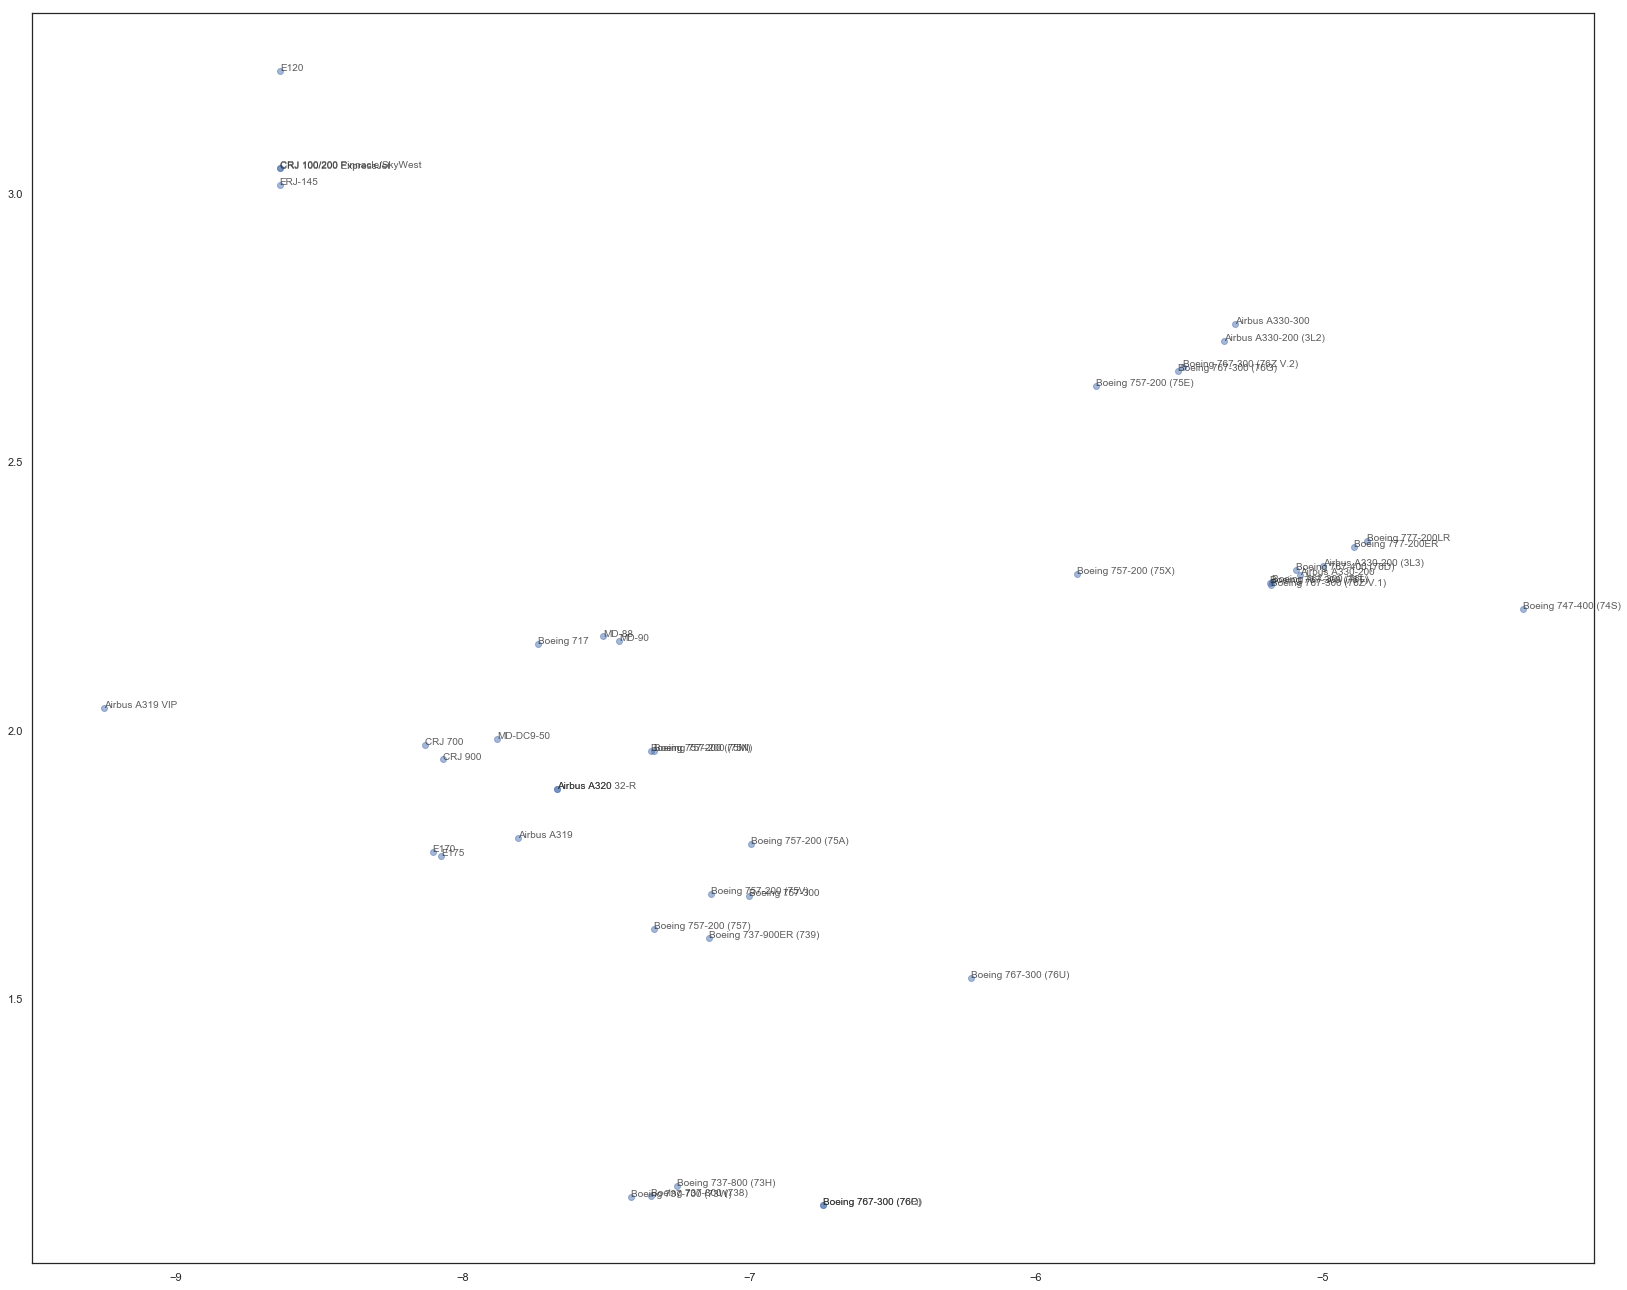

In [180]:
# Standardize
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

df=pd.read_csv("delta.csv")
df = df.iloc[:, 1:33].values

dfscaler = StandardScaler().fit_transform(df)

plt.figure(figsize=(28,23))

model = TSNE(learning_rate=50)

tsne_features = model.fit_transform(dfscaler)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]
plt.scatter(xs, ys, alpha=0.5)
# Annotate the points
for x, y, aircraft in zip(xs, ys, aircrafts):
    plt.annotate(aircraft, (x, y), fontsize=10, alpha=0.75)

plt.show()


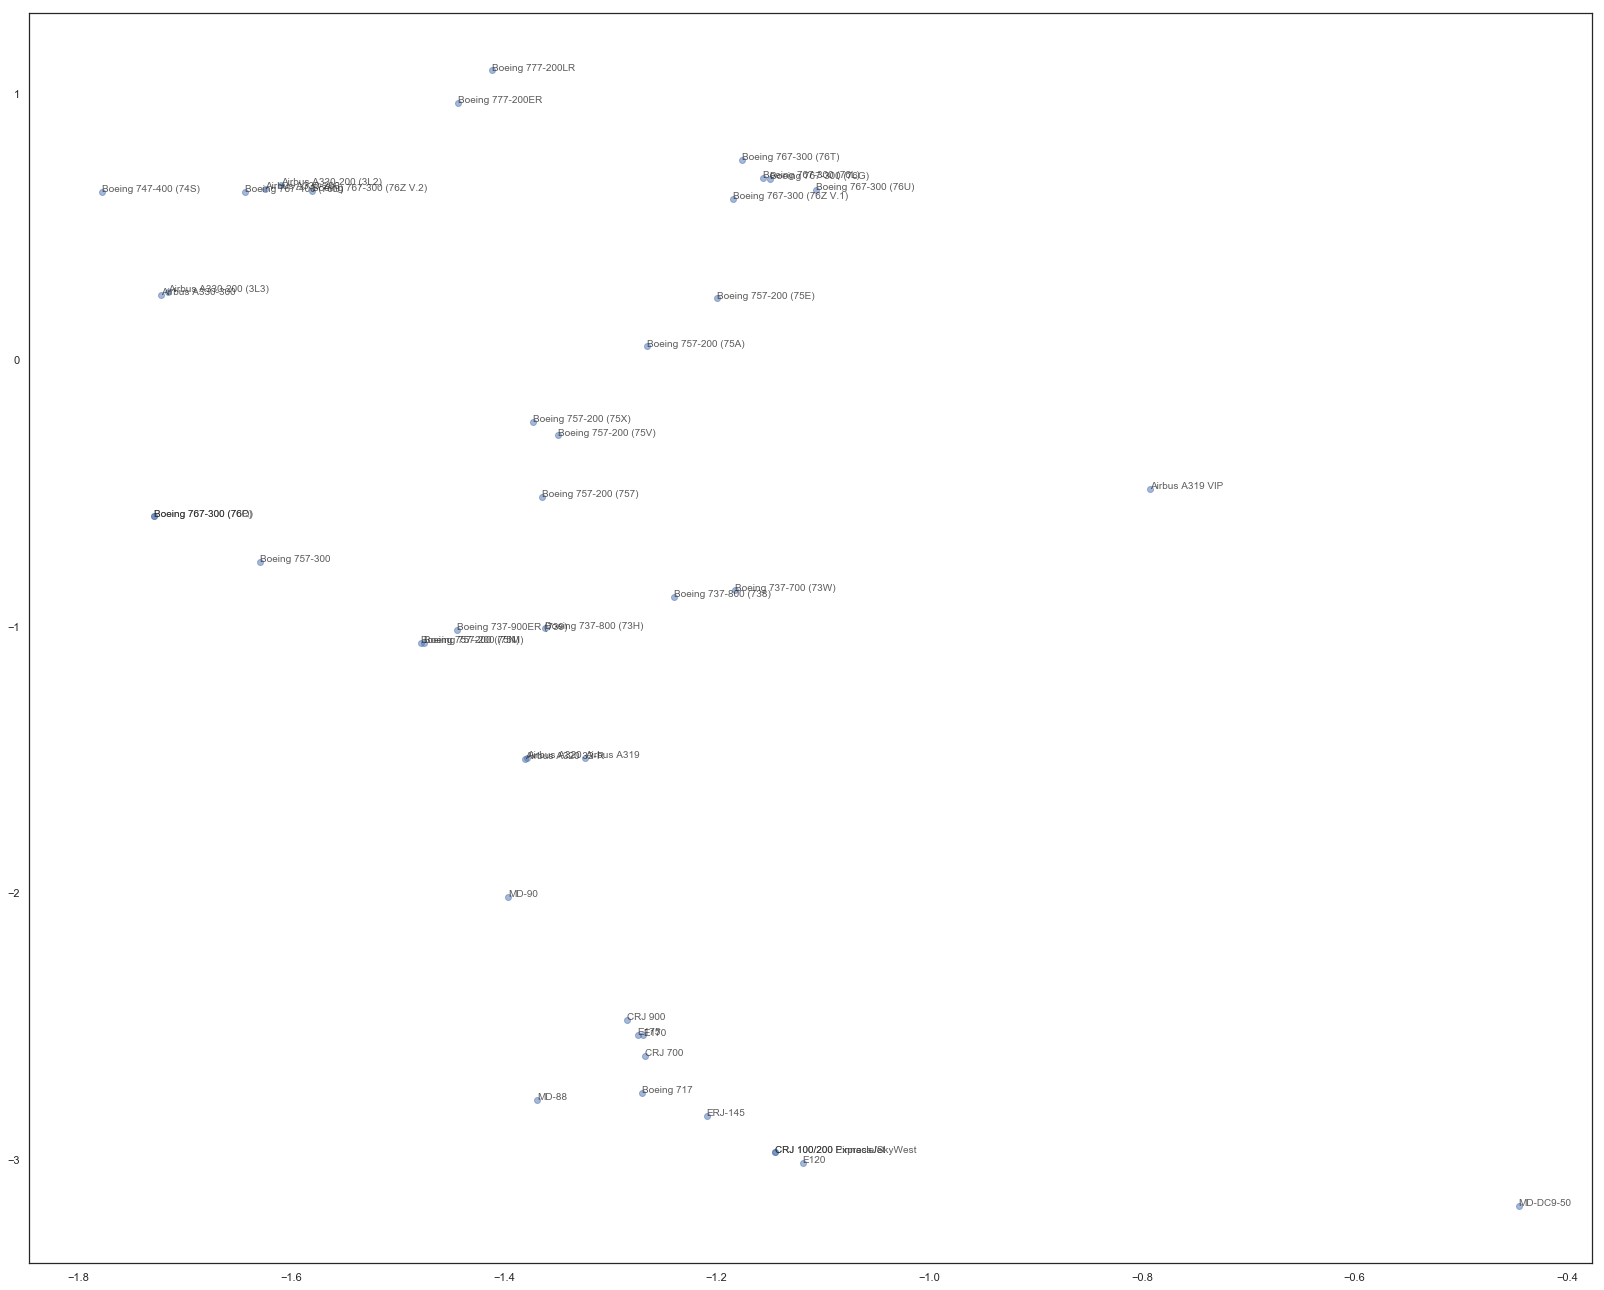

In [179]:
# Normalize
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE

df=pd.read_csv("delta.csv")
df = df.iloc[:, 1:33].values

normalized_delta = normalize(df)

plt.figure(figsize=(28,23))

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

tsne_features = model.fit_transform(normalized_delta)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, aircraft in zip(xs, ys, aircrafts):
    plt.annotate(aircraft, (x, y), fontsize=10, alpha=0.75)

plt.show()


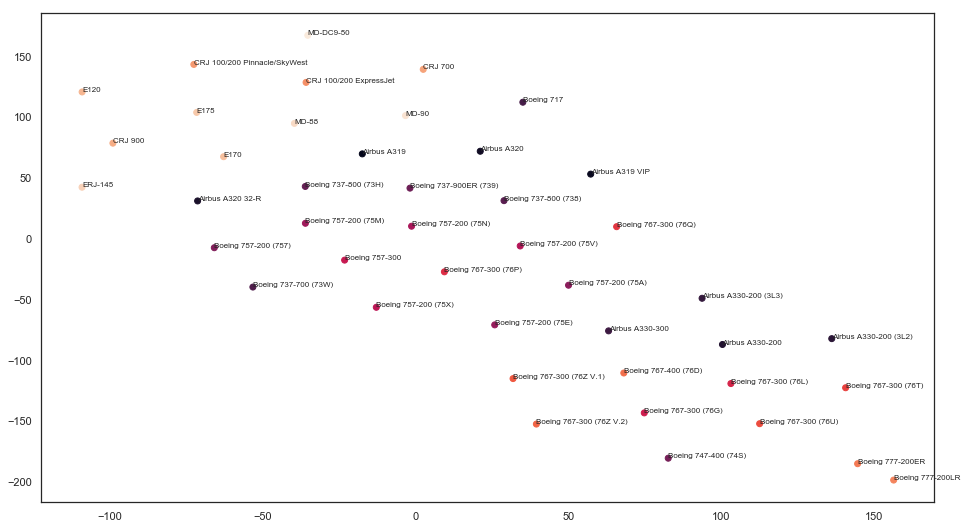

In [178]:
df=pd.read_csv('delta.csv')
delta = df.iloc[:, 1:33].values
aircraft_name = df.iloc[:,0].values
aircraft_cat = df['Aircraft'].astype('category').cat.codes

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model = TSNE(learning_rate=200)
tsne_transformed=model.fit_transform(delta)
fig, ax = plt.subplots(figsize=(16,9))
xs = tsne_transformed[:,0]
ys = tsne_transformed[:,1]
ax.scatter(xs,ys,c=aircraft_cat)
for i, txt in enumerate(aircraft_name):
    plt.annotate(txt,(xs[i],ys[i]),size=8)

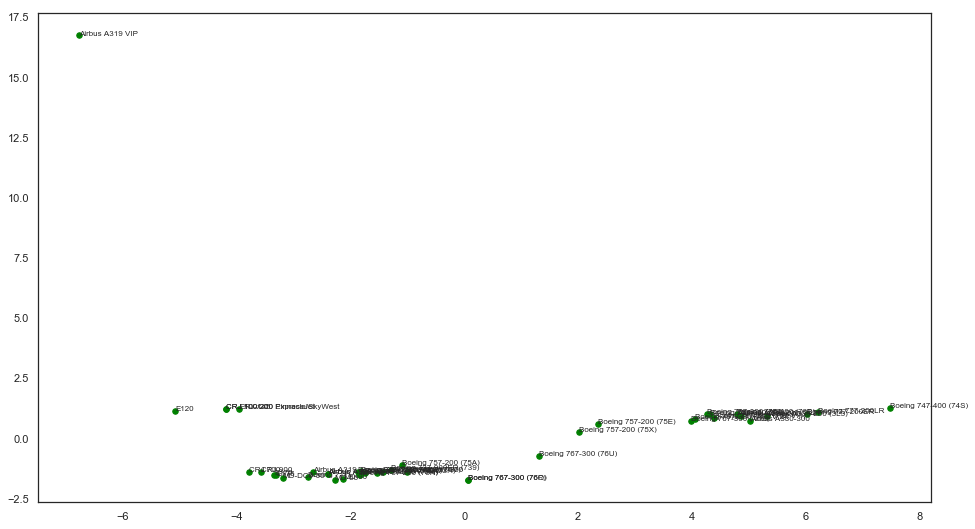

In [174]:
reduced = np.load('delta_reduced.npy')

fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(reduced[:,0], reduced[:,1], s=30, c='green')
for i, txt in enumerate(aircraft_name):
    ax.annotate(txt,(reduced[:,0][i], reduced[:,1][i]), size=8)

Interpretation for t-SNE: PCA performs a linear mapping of the data to lower-dimensional space by maximizing the variance in low-dimensional representation with calculating the eigenvectors from the covariance matrix. PCA works better on the diagram that points distribute on a roughly linear relationship. However, in this delta case, points didn't show a strong linear relationship and are a little messy. According to final result visualization, I think t-SNE performs a more organized dimension reduction method since the points are more scattered than the diagram by using the PCA method. (4 sentences)

------------

### Problem 5 (Bonus)

Apply Hiearchical Clustering to delta.csv and observe how physical features are being clustered in ealry leaves at the bottom. Please submit your code and dendrogram graph along with 1-2 sentences interpretation.

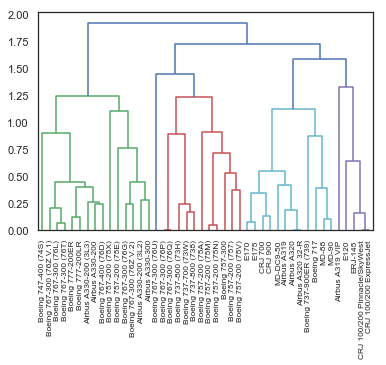

In [181]:
from scipy.cluster.hierarchy import linkage, dendrogram
df.shape
from sklearn.preprocessing import normalize

df = pd.read_csv('delta.csv', index_col='Aircraft')
df.columns.get_loc("Length (ft)")

scaler = StandardScaler()
X = scaler.fit_transform(df, y=None)
dfs = normalize(X)

mergings = linkage(dfs, method='complete')
dendrogram(mergings, labels = list(df.index), leaf_rotation=90,
           leaf_font_size=8.4)


#"Your code here"
plt.show()

Interpretation for applying Hiearchical Clustering to delta.csv: 

The dendrogram by hierarchical clustering clearly classified different aircraft models into groups and finally combined all the sub-clusters into a large cluster that includes every model. The length of each branch reasonably shows the distance between each element in the cluster. (2 sentences)

#### Extra-Bonus Credit(Explaining PCA)   :)

In [182]:
# Principal Component Analysis
from sklearn.decomposition import PCA


# We can print out rotation matrix and variance associated with each
# projected dimension

vars = pca.explained_variance_ratio_
c_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

print('Variance:  Projected dimension')
print('------------------------------')
for idx, row in enumerate(pca.components_):
    output = '{0:4.1f}%:    '.format(100.0 * vars[idx])
    output += " + ".join("{0:5.2f} * {1:s}".format(val, name) \
                      for val, name in zip(row,list(df) ))
    print(output + '\n')

Variance:  Projected dimension
------------------------------
41.1%:    -0.08 * Seat Width (Club) + -0.08 * Seat Pitch (Club) + -0.08 * Seat (Club) + -0.18 * Seat Width (First Class) + -0.17 * Seat Pitch (First Class) + -0.13 * Seats (First Class) +  0.22 * Seat Width (Business) +  0.23 * Seat Pitch (Business) +  0.24 * Seats (Business) +  0.13 * Seat Width (Eco Comfort) +  0.14 * Seat Pitch (Eco Comfort) +  0.25 * Seats (Eco Comfort) +  0.09 * Seat Width (Economy) +  0.08 * Seat Pitch (Economy) +  0.23 * Seats (Economy) +  0.24 * Accommodation +  0.13 * Cruising Speed (mph) +  0.25 * Range (miles) +  0.08 * Engines +  0.25 * Wingspan (ft) +  0.24 * Tail Height (ft) +  0.25 * Length (ft) + -0.16 * Wifi +  0.18 * Video +  0.20 * Power + -0.01 * Satellite +  0.20 * Flat-bed +  0.11 * Sleeper + -0.08 * Club + -0.18 * First Class +  0.22 * Business +  0.13 * Eco Comfort +  0.08 * Economy

24.1%:     0.32 * Seat Width (Club) +  0.32 * Seat Pitch (Club) +  0.32 * Seat (Club) + -0.11 * Seat W

Interpretation:   
The percentage in front of each paragraph is the factor score of each component in PCA.    

For example: 41.1%:    -0.08 * Seat Width (Club) + -0.08 * Seat Pitch (Club) + -0.08 * Seat (Club) + -0.18 * Seat Width (First Class) + -0.17 * Seat Pitch (First Class) + ......   

Interpretation: -0.08 is the coefficient for seat width(club), so each variable from the delta.csv dataset will have a corresponding coefficient. The sum of the product of each coefficient and the variable number from the data sheet will be the factor score of the component.

-----------